In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import io, color
from sklearn.cluster import KMeans

In [2]:
def show_image(image, title='Image'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def save_image(image, filename='image.png'):
    plt.imshow(image)
    plt.axis('off') 
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

In [4]:
def fullscreen_compare(before_image, after_image, title_before="Before", title_after="After"):
    before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
    after_image = cv2.cvtColor(after_image, cv2.COLOR_BGR2RGB)
    
    # Create named windows for fullscreen
    cv2.namedWindow(title_before, cv2.WINDOW_NORMAL)
    cv2.setWindowProperty(title_before, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

    # Display the before image first
    img_to_show = before_image.copy()
    cv2.putText(img_to_show, title_before, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow(title_before, img_to_show)

    is_before = True

    while True:
        key = cv2.waitKey(1) & 0xFF

        # Press space to toggle between before and after images
        if key == ord(' '):
            if is_before:
                img_to_show = after_image.copy()
                cv2.putText(img_to_show, title_after, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                cv2.imshow(title_before, img_to_show)
                is_before = False
            else:
                img_to_show = before_image.copy()
                cv2.putText(img_to_show, title_before, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                cv2.imshow(title_before, img_to_show)
                is_before = True

        # Press 'q' to quit comparison
        elif key != 255:  # Any key press exits (excluding no key press which gives 255)
            break

    cv2.destroyAllWindows()

def sequential_compare(images, images_after, titles):
    """Compare two sets of images sequentially with fullscreen toggle."""
    for before_image, after_image, title in zip(images, images_after, titles):
        fullscreen_compare(before_image, after_image, f"{title} - Before", f"{title} - After")

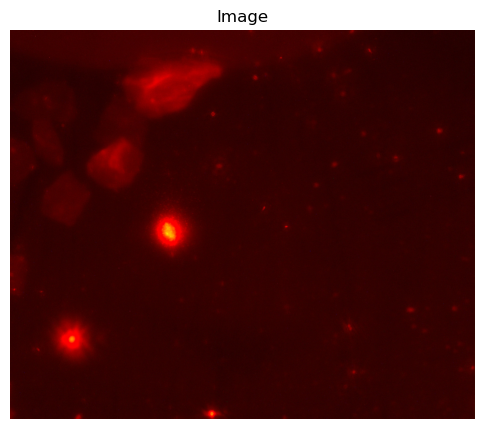

In [5]:
img = io.imread('cell.jpg')
show_image(img)

### play with contrast

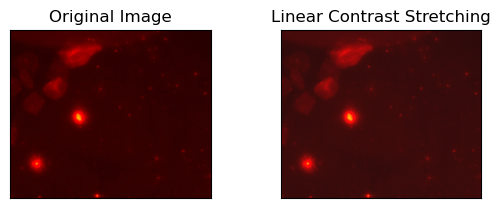

In [6]:
def linear_contrast_stretch(img, lb, rb):
    return cv2.normalize(img, None, lb, rb, cv2.NORM_MINMAX)

# Исходное изображение
assert img is not None, "file could not be read, check with os.path.exists()"

# Линейное растяжение контраста
img_linear_contrast = linear_contrast_stretch(img, 10, 255)

# Визуализация результата всех фильтров
titles = ['Original Image', 'Linear Contrast Stretching']
images = [img, img_linear_contrast]

for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### немного сдвинуть нижнюю границу - пятна слева стали чётче

In [7]:
img = img_linear_contrast

### clahe

In [8]:
def apply_clahe(img):
    if len(img.shape) == 3 and img.shape[2] == 3:  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(1, 1))
    return clahe.apply(img)

In [9]:
img_clahe = apply_clahe(img)

In [10]:
plot_histogram(img, "Гистограмма до CLAHE")
plot_histogram(img_clahe, "Гистограмма после CLAHE")

fullscreen_compare(img, img_clahe, "Before CLAHE", "After CLAHE")

NameError: name 'plot_histogram' is not defined

In [ ]:
img = img_clahe

### растяжение динамического диапазона интенсивносте
𝐼𝑛𝑒𝑤 = 256 * ((𝐼 − 𝐼𝑚𝑖𝑛)/(𝐼𝑚𝑎𝑥 − 𝐼𝑚𝑖𝑛 ))^𝛼

In [ ]:
def dynamic_range_stretch(img, alpha=1.0):
    I_min, I_max = np.min(img), np.max(img)
    I_new = 255 * ((img - I_min) / (I_max - I_min)) ** alpha
    return np.clip(I_new, 0, 255).astype(np.uint8)

In [ ]:
img_dynamic_stretch = dynamic_range_stretch(img, alpha=0.7)

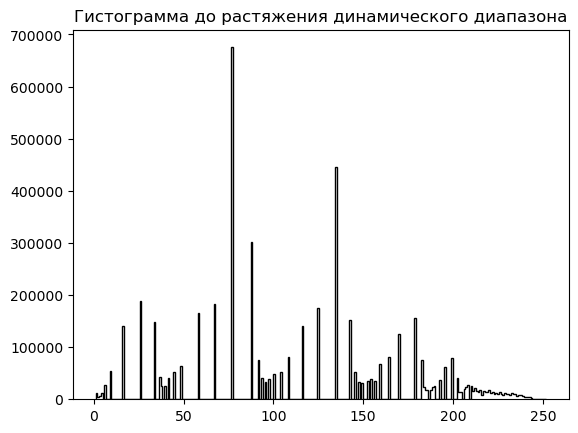

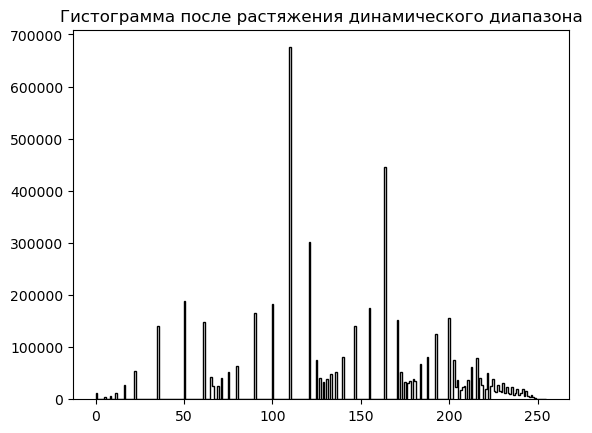

In [ ]:
plot_histogram(img, "Гистограмма до растяжения динамического диапазона")
plot_histogram(img_dynamic_stretch, "Гистограмма после растяжения динамического диапазона")

In [ ]:
fullscreen_compare(img, img_dynamic_stretch, "Before Dynamic Range Stretching", "After Dynamic Range Stretching")

In [ ]:
img = img_dynamic_stretch

### нарисуем гистограмму яркости и попробуем немного сделать поярче

In [ ]:
def plot_histogram(img, title='Гистограмма'):
    plt.hist(img.ravel(), bins=256, histtype='step', color='black')
    plt.title(title)
    plt.show()

In [ ]:
def increase_brightness(img, value=10):
    return np.clip(img + value, 0, 255).astype(np.uint8)

In [ ]:
img_bright = increase_brightness(img, -20)

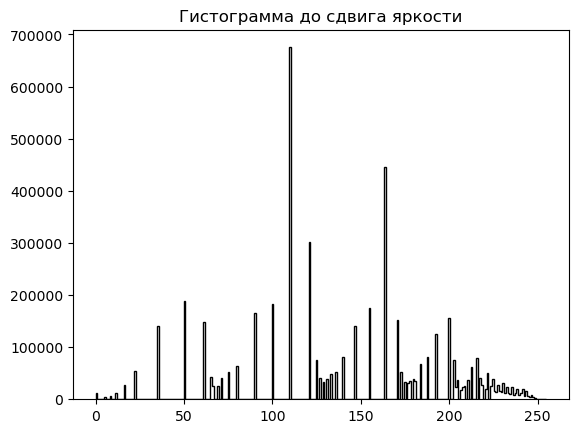

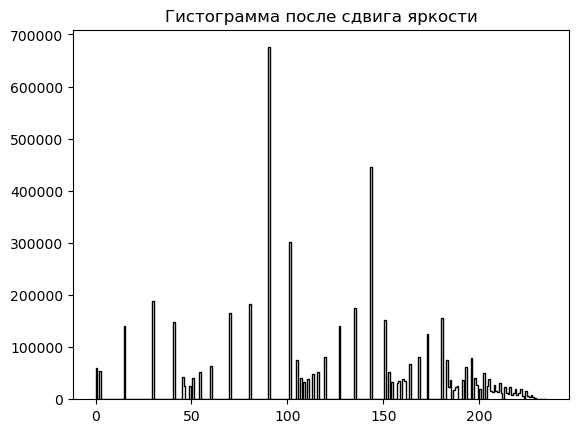

In [ ]:
# Построение гистограммы до и после сдвига
plot_histogram(img, "Гистограмма до сдвига яркости")
plot_histogram(img_bright, "Гистограмма после сдвига яркости")

In [ ]:
# Сравнение изображений до и после
fullscreen_compare(img, img_bright, "Before Brightness Adjustment", "After Brightness Adjustment")

In [ ]:
img = img_bright

### CLAHE + динамическое растяжение (1.3) + линейный сдвиг яркости (тут можно менять на вкус уже) - достаточно хорошо выделяют контуры с произвольной точностью

### simple thresholding

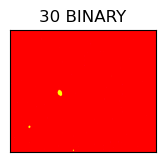

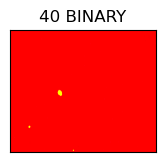

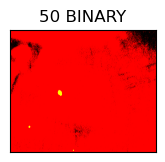

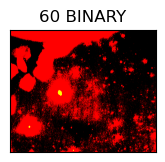

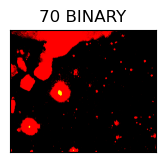

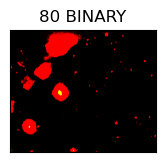

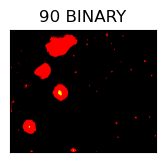

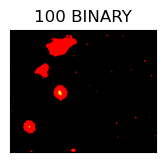

In [11]:
threshold_values = [30, 40, 50, 60, 70, 80, 90, 100]
threshold_types = ['BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

for threshold_value in threshold_values:
    ret, thresh1 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    ret, thresh2 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)
    ret, thresh3 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)
    ret, thresh4 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)
    ret, thresh5 = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)

    titles = [f'{threshold_value} BINARY', f'{threshold_value} BINARY_INV',
              f'{threshold_value} TRUNC', f'{threshold_value} TOZERO',
              f'{threshold_value} TOZERO_INV']
    images = [thresh1, thresh2, thresh3, thresh4, thresh5]
    
    for i in range(1): # range 5 for all modes
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    
    plt.show()
